#### We are concerned about comparing two important Brazilian ETFs regarding a risk-reward analysis, a large-cap ETF (BOVA11), and a small-cap ETF (SMAL11).
#### We're using statistics and financial math to evaluate the correlation and risk-adjusted return of both assets. Whether or not to keep both of them in your portfolio will be worth it or it had better pick up one of them. In that case, what should you choose?

## Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sea
import os
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


C:\Users\Rodolfo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Datesets

In [2]:
#BOVA11 and SMAL11 quotation from 09/30/2014 to 08/31/2020 6 years
def clean_data(file1,file2,period):
    function = lambda x: dt.datetime.strptime(x,'%b %d, %Y')
    df1 = pd.read_csv(file1, usecols= ['Date', 'Price'], converters= {'Date':function }, parse_dates= True)
    df2 = pd.read_csv(file2, usecols= ['Date', 'Price'], converters= {'Date':function }, parse_dates= True)
    df_day = pd.merge(df1,df2, how = 'inner', left_on= "Date", right_on= "Date")
    df_day = df_day.rename( columns = {'Price_x': 'BOVA11','Price_y': 'SMAL11'}).set_index('Date').sort_index(ascending = True)
    df = df_day.to_period('M').reset_index()
    df = df.drop_duplicates(subset = 'Date', keep = 'last').set_index('Date')
    if period == 'D':
        return df_day
    if period == 'M':
        return df
df_day =clean_data('Market Data\\BOVA11 Historical Data.csv', 'Market Data\\SMAL11 Historical Data.csv', 'D')
df = clean_data('Market Data\\BOVA11 Historical Data.csv', 'Market Data\\SMAL11 Historical Data.csv', 'M')
display(df_day,df)
                                                                                                            
                       

,BOVA11,SMAL11
Date,,
2014-09-30,52.64,58.59
2014-10-01,51.14,56.99
2014-10-02,51.80,57.10
2014-10-03,53.04,58.01
2014-10-06,55.71,60.00
...,...,...
2020-08-25,98.35,119.80
2020-08-26,96.63,117.85
2020-08-27,96.87,116.70


,BOVA11,SMAL11
Date,,
2014-09,52.64,58.59
2014-10,52.98,57.65
2014-11,53.15,57.28
2014-12,48.54,53.11
2015-01,45.61,46.79
...,...,...
2020-04,77.21,90.42
2020-05,84.15,94.65
2020-06,91.62,107.80


## Binominal Analysis

In [3]:
df_day = df_day.reset_index()
df_day

,Date,BOVA11,SMAL11
0,2014-09-30,52.64,58.59
1,2014-10-01,51.14,56.99
2,2014-10-02,51.80,57.10
3,2014-10-03,53.04,58.01
4,2014-10-06,55.71,60.00
...,...,...,...
1457,2020-08-25,98.35,119.80
1458,2020-08-26,96.63,117.85
1459,2020-08-27,96.87,116.70
1460,2020-08-28,98.30,118.50


Text(0.5, 0, 'Time')

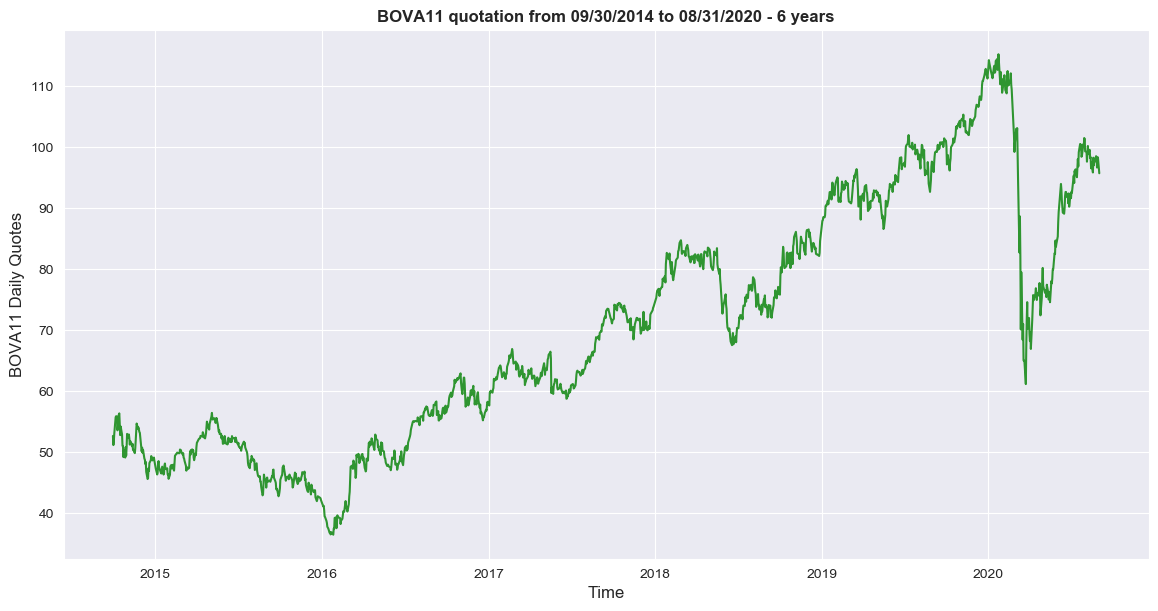

In [4]:
#Ploting BOVA11
df_day = df_day.reset_index()
plt.figure()
sea.set_style('darkgrid')#'axes.grid':False})

plt.plot(df_day['Date'], df_day['BOVA11'], color = 'green', alpha = 0.8)
#ax.set_xticklabels(month_series.index.strftime('%Y-%m'))

#Size and figure setting 
plt.gcf().set_size_inches(14,7)
plt.gcf().set_dpi(100)
plt.tick_params( top = False, right =  False)

#Axis labels, title and legend
plt.title('BOVA11 quotation from 09/30/2014 to 08/31/2020 - 6 years', fontweight = 'bold')
plt.ylabel('BOVA11 Daily Quotes', size = 12)
plt.xlabel('Time', size = 12)
#plt.legend('Index', loc = 'upper center')

In [5]:
df_day = df_day.copy().set_index('Date').drop(['index'], axis = 1)
df_day

,BOVA11,SMAL11
Date,,
2014-09-30,52.64,58.59
2014-10-01,51.14,56.99
2014-10-02,51.80,57.10
2014-10-03,53.04,58.01
2014-10-06,55.71,60.00
...,...,...
2020-08-25,98.35,119.80
2020-08-26,96.63,117.85
2020-08-27,96.87,116.70


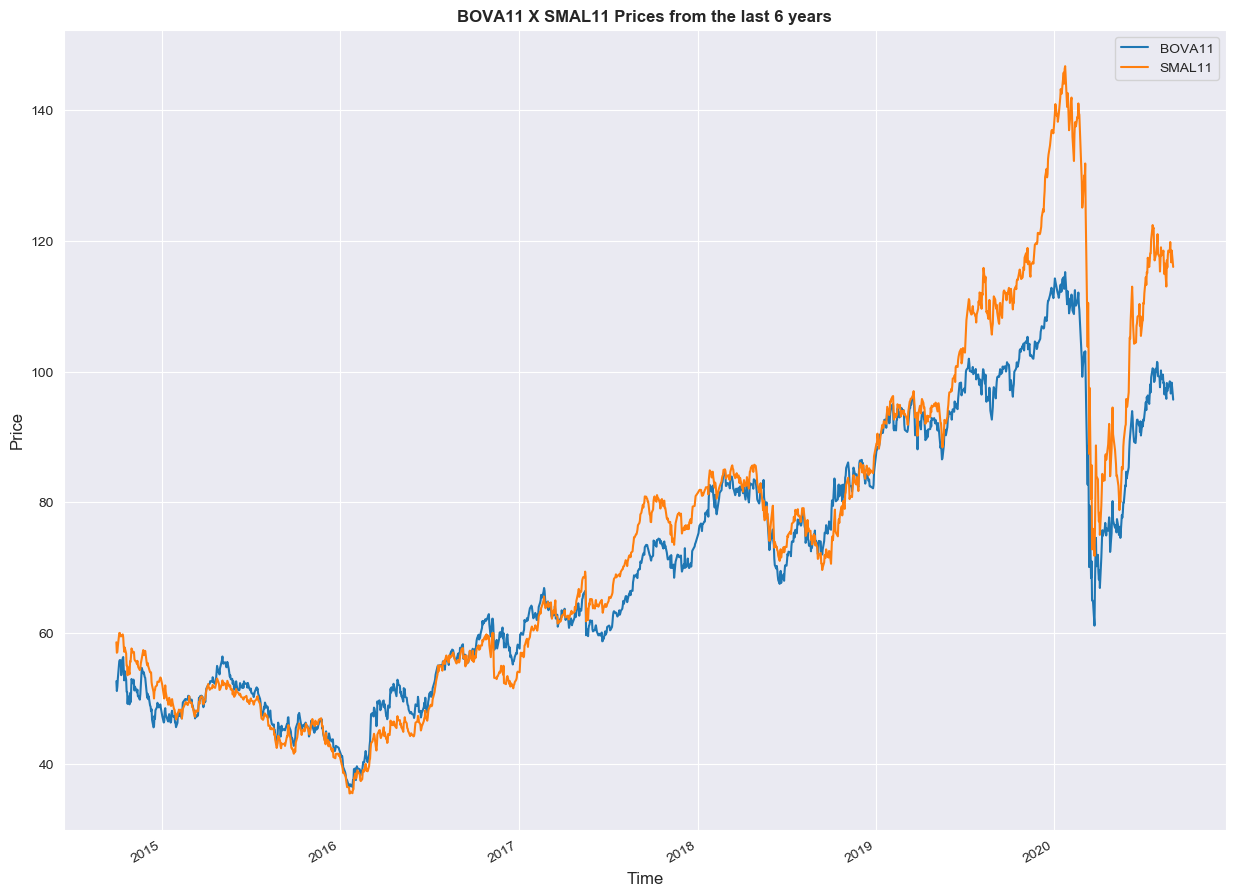

In [6]:
#Setting ploting
sea.set_style('darkgrid', {'axes.grid': True})

df_day.plot(kind = 'line', figsize = (15,8))
plt.xlabel ('Time',fontsize =12)
plt.ylabel('Price',fontsize =12)
plt.title('BOVA11 X SMAL11 Prices from the last 6 years',fontsize =12, fontweight = 'bold')
plt.gcf().set_size_inches(15,10)
plt.gcf().set_dpi(100)
plt.subplots_adjust(bottom = 0.08)

In [7]:
corr = df_day['BOVA11'].corr(df_day['SMAL11'], method = 'pearson')
print('Correlation:',corr)

Correlation: 0.9779984243491359


### Applying Least Squares Method to plot the linear regression curve

Text(80, 140, '$Y = -14.68 + 1.26X$\n $Corr = 0.98$')

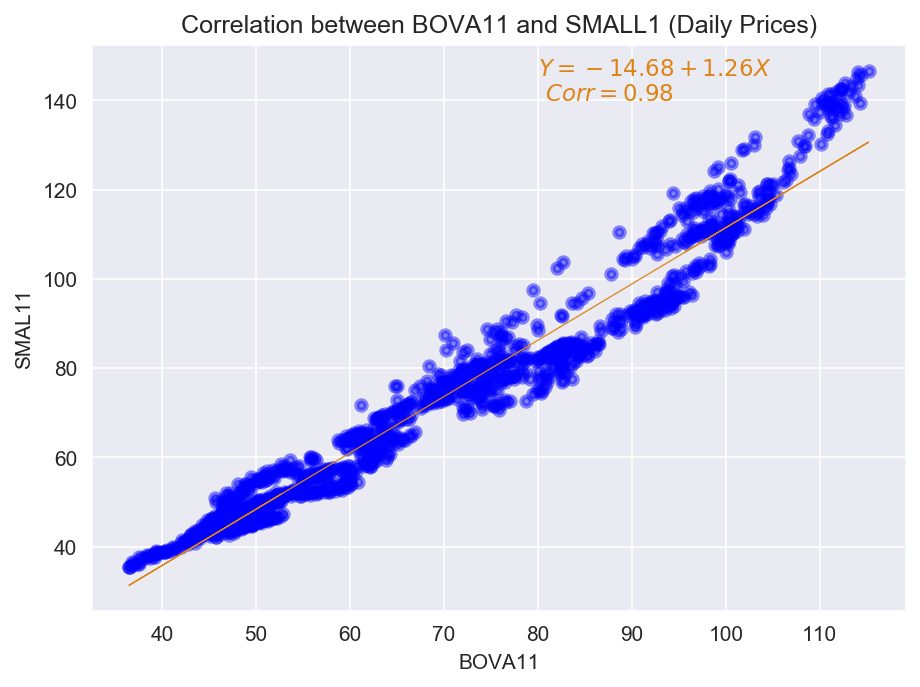

In [8]:
#Scatter Plot
#Plotting
df_day.plot.scatter(x = 'BOVA11',y = 'SMAL11', color = 'blue', alpha = 0.45, linewidth = 2.4, figsize = (7.3,6), legend ='scatter')
plt.gcf().set_dpi(150)
plt.gcf().set_size_inches(7,5)
plt.title('Correlation between BOVA11 and SMALL1 (Daily Prices)')
#linear fit
m,b = np.polyfit(df_day['BOVA11'], df_day['SMAL11'], 1)
plt.plot(df_day['BOVA11'],b + m *df_day['BOVA11'], linewidth = 0.6, c= '#de8416', label = 'linear regression')
 
#Text
font = {'family': 'serif',
        'color':  '#de8416',
        'weight': 'normal',
        'size': 11}
text = '$Y = {} + {}X$\n $Corr = {}$'.format(round(b,2),round(m,2), round(corr,2))


plt.text(80,140, text, fontdict= font)

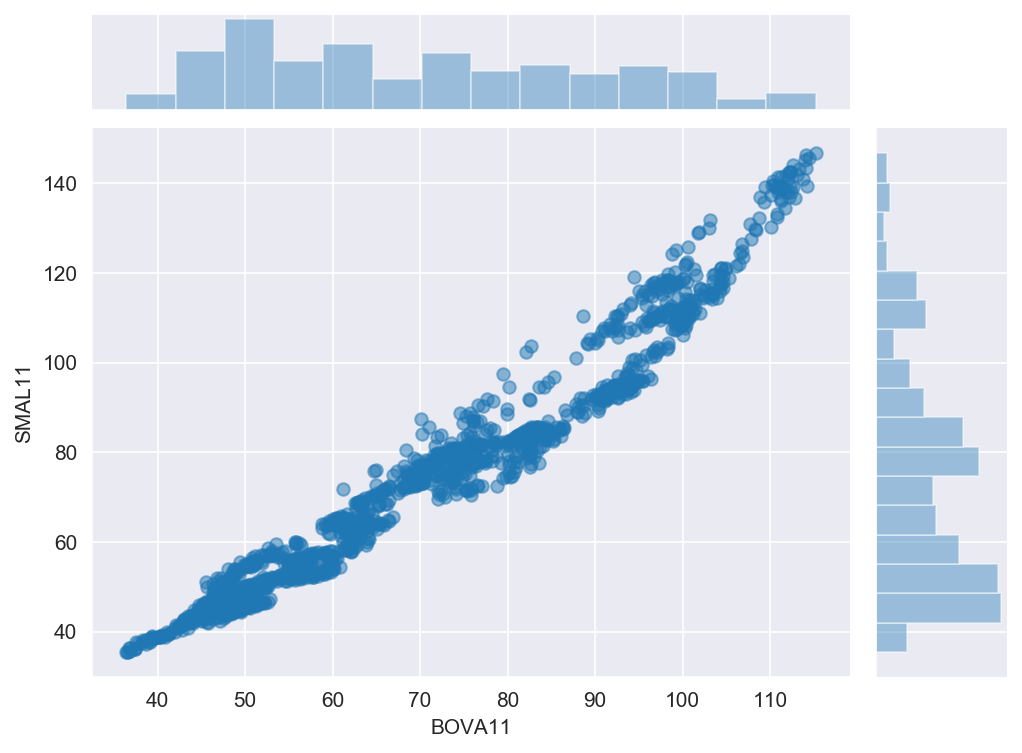

In [9]:
#Lookin at the distribution of daily returns
sea.jointplot(df_day['BOVA11'],df_day['SMAL11'], alpha = 0.5)

#Seting
plt.gcf().set_dpi(150)
plt.gcf().set_size_inches(7,5)

## Risk Analysis


#### Multi Period return

The total return over a multi period of time
Given n periods the total return is:

# $$ R_{t,t+n} = (1 + R_{t,t+1})(1 + R_{t+1,t+2})....(1 + R_{t + n -1,t+n}) -1 $$



In [10]:
# Measuring compounding returns
# from 09/30/2014 to 08/31/2020 6 years
#Monthly quotes
total_return = (df.pct_change() +1).prod() - 1
total_return

BOVA11    0.818009
SMAL11    0.979860
dtype: float64

In [11]:
# Measuring compounding returns
# from 09/30/2014 to 08/31/2020 6 years
#Dayly quotes
total_return = (df_day.pct_change() +1).prod() - 1
total_return

BOVA11    0.818009
SMAL11    0.979860
dtype: float64

In [12]:
df.shape

(72, 2)

In [13]:
# Return per month
n_month = df.shape[0] #72 months
return_month = (df.pct_change() + 1).prod()**(1/n_month) -1
return_month

BOVA11    0.008337
SMAL11    0.009532
dtype: float64

In [14]:
#Return Per Year
return_y = (return_month + 1)**12 -1
return_y

BOVA11    0.104755
SMAL11    0.120570
dtype: float64

In [15]:
#Rturn per Year measured directly from the total return
# Return per mon
return_annualized= (df_day.pct_change() + 1).prod()**(12/n_month) -1
return_annualized


BOVA11    0.104755
SMAL11    0.120570
dtype: float64

In [16]:
#Measuring the compounding returns over all peridos from annualized return
(return_annualized + 1)**6 - 1

BOVA11    0.818009
SMAL11    0.979860
dtype: float64

In [17]:
#Measuring the compounding returns over all peridos from monthly return
(return_month+1)**72 -1

BOVA11    0.818009
SMAL11    0.979860
dtype: float64

In [18]:
returns_day = df_day.pct_change().drop(df_day.index[0], axis= 0)
returns_day

,BOVA11,SMAL11
Date,,
2014-10-01,-0.028495,-0.027308
2014-10-02,0.012906,0.001930
2014-10-03,0.023938,0.015937
2014-10-06,0.050339,0.034304
2014-10-07,0.002872,0.000500
...,...,...
2020-08-25,-0.001523,0.012252
2020-08-26,-0.017489,-0.016277
2020-08-27,0.002484,-0.009758


In [19]:
returns = df.pct_change().drop(df.index[0], axis= 0)
returns

,BOVA11,SMAL11
Date,,
2014-10,0.006459,-0.016044
2014-11,0.003209,-0.006418
2014-12,-0.086736,-0.072800
2015-01,-0.060363,-0.118998
2015-02,0.096470,0.057705
...,...,...
2020-04,0.113338,0.148774
2020-05,0.089885,0.046782
2020-06,0.088770,0.138933


### Standard Deviation (Volatility)
### SD  standard deviation is a measure of the amount of variation or dispersion of a set of values.
## $$ \sigma_{R} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (R_{i} - \bar{R})^2}  $$ 
###  That formula above is called" uncorrected sample standard deviation" since you use the size of the sample as the size of population. It's widely accepted when the population is normally distributed or when a sample has a very large size
### This is a biased estimator, as the estimates are generally too low. The bias decreases as sample size grows
### Corrected sample standard deviation
# $$ \sigma_{R} = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} (R_{i} - \bar{R})^2}  $$ 
### This is a consistent estimator because the biased sample variance is used to estimate the population's standard deviation

In [29]:
#Monthly volatility
returns.std()


BOVA11    0.071278
SMAL11    0.077248
dtype: float64

In [30]:
#From Scracth
# monthly volatility
squared_dev = (returns - returns.mean())**2
n_of_obs = returns.shape[0]
variance = squared_dev.sum()/(n_of_obs-1)
volatility = np.sqrt(variance) # degree of freedom = 1
volatility

BOVA11    0.071278
SMAL11    0.077248
dtype: float64

### Annualizied Volatility
# $$ \sigma_{ann} = \sigma_{p}\sqrt{p} $$
### Given p as the number of periods in a year (ex: 252 days, 4 quarters ) and sigma p  as the volatitlily from each period

In [31]:
vol_annual = volatility*np.sqrt(12)
vol_annual

BOVA11    0.246913
SMAL11    0.267596
dtype: float64

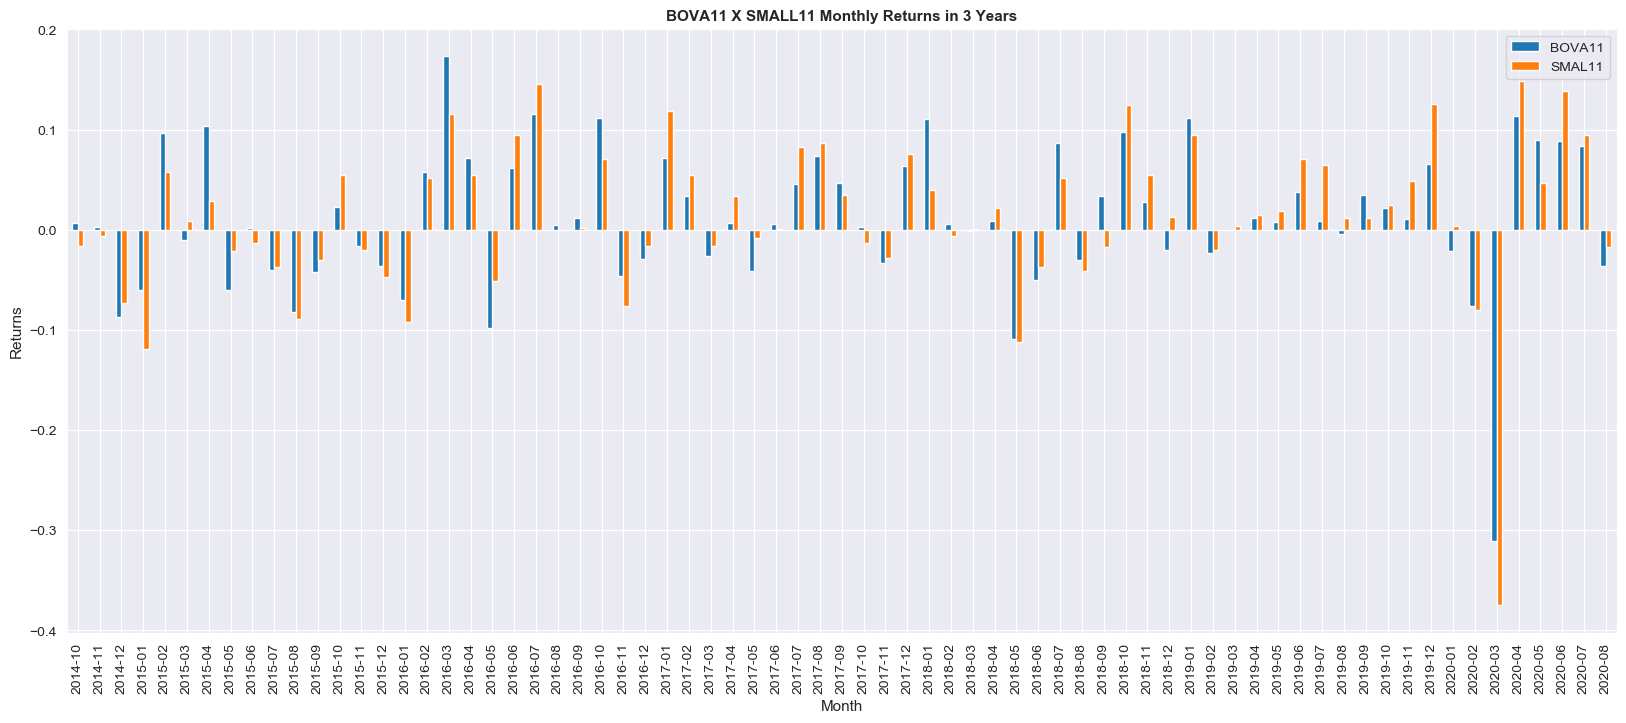

In [48]:
returns.plot(kind = 'bar')

#Labels
plt.title('BOVA11 X SMALL11 Monthly Returns in 3 Years', fontweight = 'bold', fontsize = '11')
plt.xlabel('Month',fontsize = 11)
plt.ylabel('Returns',fontsize = 11)


#settings
sea.set_style('darkgrid', {'axes.grid': 'True'})
plt.gcf().set_size_inches(20,8)
plt.gcf().set_dpi(100)

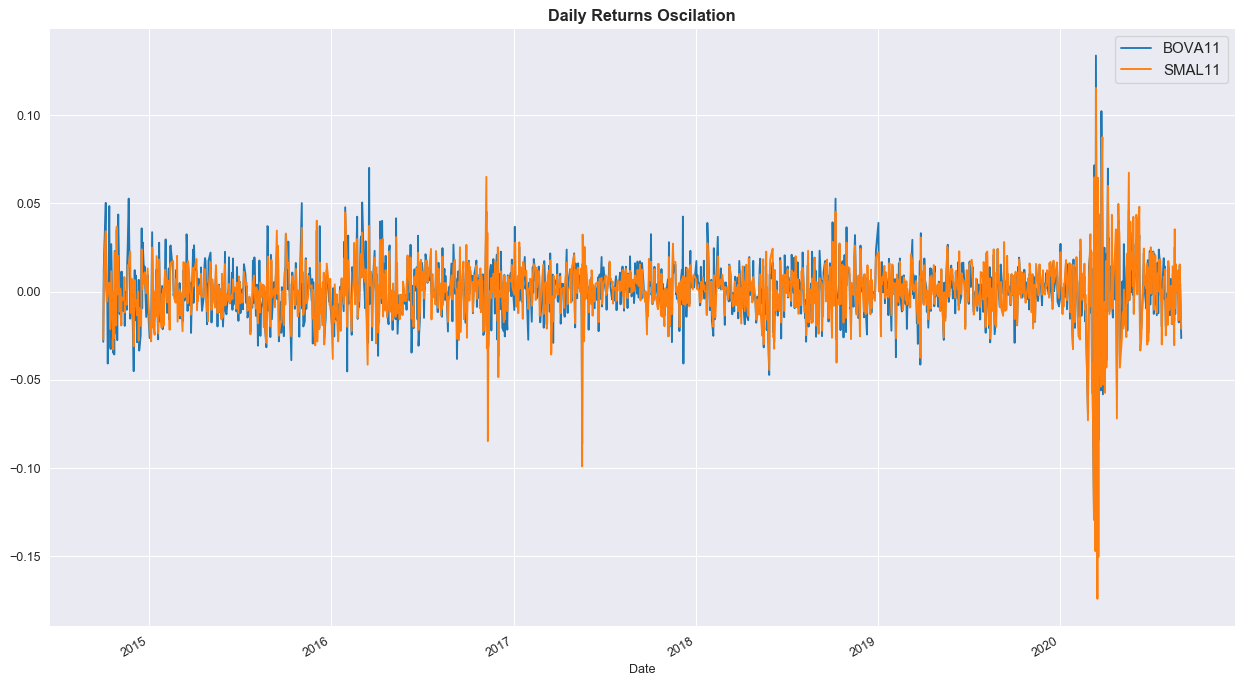

In [37]:
#Dayly Varinace of Returns 
return_day = df_day.pct_change()
return_day.plot(kind = 'line', title = 'Returns' )
plt.title('Daily Returns Oscilation', fontweight = 'bold', fontsize = 13)
plt.gcf().set_size_inches(17,8)
plt.gcf().set_dpi(90)
plt.legend(fontsize = 12)
plt.subplots_adjust(bottom = 0.05)


In [34]:
#Risk Ratio
(return_month - 0.005)/volatility

BOVA11    0.046810
SMAL11    0.058663
dtype: float64

## Semi-deviation
### Semi-deviation is the volatility of the sub-sample of below-average or below-zero returns.
### It's intersting in most of cases because investor are more concernd about the volatility (uncertainty) on the downside than upside
#  $$ \sigma_{semi} = \sqrt{\frac{1}{N} \sum_{R_{i}\le\bar{R}}^{N} (R_{i} - \bar{R})^2}  $$ 
### Where N is the number of returns that fall below the mean

In [123]:
#Measuring Semi Desviation
returns[returns <0].std(ddof = 1)

BOVA11    0.058309
SMAL11    0.071210
dtype: float64

## Descriptive Statistics

In [124]:
#Descriptive information
returns.describe()

,BOVA11,SMAL11
count,71.000000,71.000000
mean,0.011108,0.012926
std,0.071278,0.077248
min,-0.310636,-0.374821
25%,-0.029905,-0.018934
50%,0.006531,0.011338
75%,0.062470,0.054929
max,0.173462,0.148774


In [38]:
#Testing for normal distribution
#Using Shapiro-Wilk test to evaluate my data population (returns) in order to figure out whether or not my sample data proceeds a Gaussian distribution
#Sugestd for sample size N < 5000

def test_normal(serie, alpha = 0.05):
    F,p = stats.shapiro(serie)
    if p < alpha:
        outcome = "p-value {} and test statistic {}. The data dont'n follow a Gaussian distribution".format(p,F)
    else:
        outcome = "p-value {} and test statistic {}. I can't conclude the data do not follow a Gaussian shape".format(p, F)
    return outcome

In [39]:
#Testing BOVA11
test_normal(returns['BOVA11'])

"p-value 0.00039654079591855407 and test statistic 0.9249619245529175. The data dont'n follow a Gaussian distribution"

In [40]:
#Testing SMAL11
test_normal(returns['SMAL11'])

"p-value 8.055027137743309e-06 and test statistic 0.8834807276725769. The data dont'n follow a Gaussian distribution"

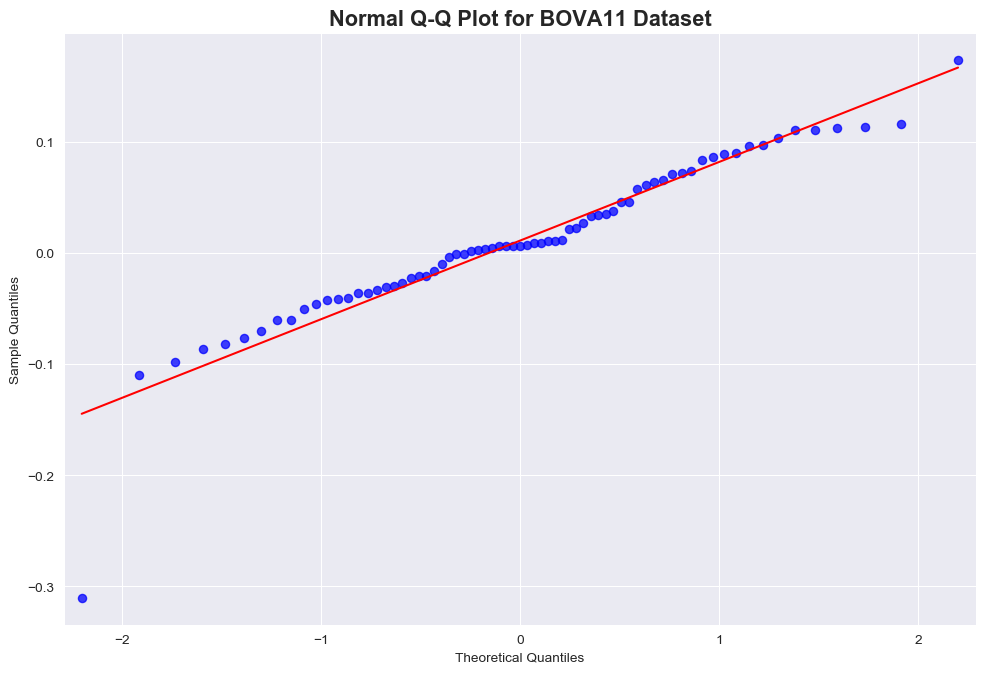

In [41]:
#Q-Q Ploting in order to figure out if the dataset fits a standar normal distribution
import statsmodels.graphics.gofplots as stmod
#plt.figure()
stmod.qqplot(returns['BOVA11'], line = 's',  alpha = 0.75, linewidth = 5)
plt.gcf().set_size_inches(7,5)
plt.title('Normal Q-Q Plot for BOVA11 Dataset', fontweight = 'bold', fontsize = 16)

#Setting
plt.gcf().set_size_inches(12,8)
plt.gcf().set_dpi(98)


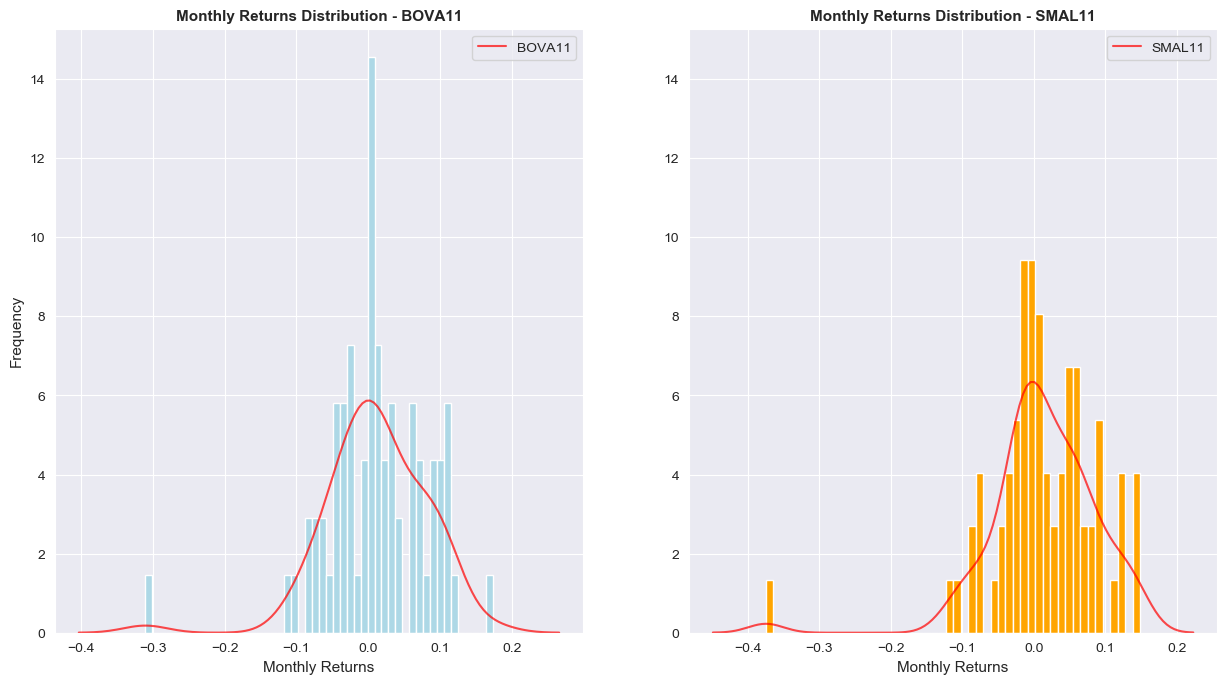

In [43]:
#Ploting distribution
plt.figure()
plt.title('Monthly Returns Distribution')

#BOVA11
ax1 = plt.subplot(1,2,1)
plt.hist(returns['BOVA11'],bins = 50, density= True, facecolor = 'lightblue')
sea.kdeplot(returns['BOVA11'],color = 'red', alpha = 0.7)
plt.ylabel('Frequency', fontsize =11)
plt.xlabel('Monthly Returns', fontsize =11)
plt.title('Monthly Returns Distribution - BOVA11',fontweight = 'bold', fontsize =11)

#SMAL11
x1 = plt.subplot(1,2,2, sharey = ax1)
plt.hist(returns['SMAL11'], bins = 50, density= True, facecolor = 'orange')
sea.kdeplot(returns['SMAL11'], color = 'red', alpha = 0.7)
plt.xlabel('Monthly Returns', fontsize =11)
plt.title('Monthly Returns Distribution - SMAL11', fontweight = 'bold', fontsize = 11)
#Setting
plt.gcf().set_size_inches(15,8)
plt.gcf().set_dpi(100)


# Skewness

## Formula for Skewness:
# $$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_{R}^3} $$


In [130]:
Skewness = stats.skew(returns)
df_kurt = pd.DataFrame([Skewness], columns = returns.columns,index = ['Skewness'])
df_kurt

,BOVA11,SMAL11
Skewness,-1.06446,-1.63983


In [131]:
#From Scratch
def skewness(df):
    deviation = df - df.mean()
    cubed_dev_avg = (deviation**3).mean()
    return (cubed_dev_avg/(df.std(ddof = 0))**3)
skewness(returns)

BOVA11   -1.06446
SMAL11   -1.63983
dtype: float64

# Kurtosis

## Formula for Kurtosis:
# $$ S(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_{R}^4} $$


In [132]:
Kurtosis = stats.kurtosis(returns)
df_kurt = pd.DataFrame([Kurtosis], columns = returns.columns,index = ['Kurtosis'])
df_kurt

,BOVA11,SMAL11
Kurtosis,4.343467,7.313218


In [133]:
def kurtosis(df):
    deviation = df - df.mean()
    cubed_dev_avg = (deviation**4).mean()
    return (cubed_dev_avg/(df.std(ddof = 0))**4)
kurtosis(returns) -3

BOVA11    4.343467
SMAL11    7.313218
dtype: float64

#### Obs: For a gaussian distribution the kurtosisness is equal 3, but most of time is more convinient to mesure the excess kurtosis,
#### In a nutshell, subtracting the the three from the expected value. The function scipy.stats.kurtosis use that 

## Sharpe Ratio (Risk-Adjusted  Return)

In [134]:
#Time-Series LFT-Sep2020 price
function = lambda x: dt.datetime.strptime(x,'%b %d, %Y')
LFT= pd.read_csv('Market Data\\LFT090120=RRPS Overview.csv', usecols= ['Date', 'Price'], converters= {'Date':function }, parse_dates= True)
LFT = LFT.rename(columns = {'Price': 'LFT-SEP2020'}).sort_values(by = 'Date', ascending = True)
LFT
#Checking if thre's duplicated dates
#LFT['Duplicated'] = LFT['Date'].duplicated()
#all(LFT['Duplicated']) 

,Date,LFT-SEP2020
1122,2016-08-08,"8,005.480"
1121,2016-08-09,"8,009.700"
1120,2016-08-10,"8,013.910"
1119,2016-08-11,"8,018.120"
1118,2016-08-12,"8,022.340"
...,...,...
4,2020-08-25,"10,686.000"
3,2020-08-26,"10,686.000"
2,2020-08-27,"10,686.000"
1,2020-08-28,"10,686.000"


In [135]:
LFT = LFT.set_index('Date')
LFT[LFT.columns[0]] = LFT[LFT.columns[0]].map(lambda x: x.replace(',',""))
LFT[LFT.columns[0]] = LFT[LFT.columns[0]].map(lambda x: float(x))
LFT

,LFT-SEP2020
Date,
2016-08-08,8005.48
2016-08-09,8009.70
2016-08-10,8013.91
2016-08-11,8018.12
2016-08-12,8022.34
...,...
2020-08-25,10686.00
2020-08-26,10686.00
2020-08-27,10686.00


<IPython.core.display.Javascript object>


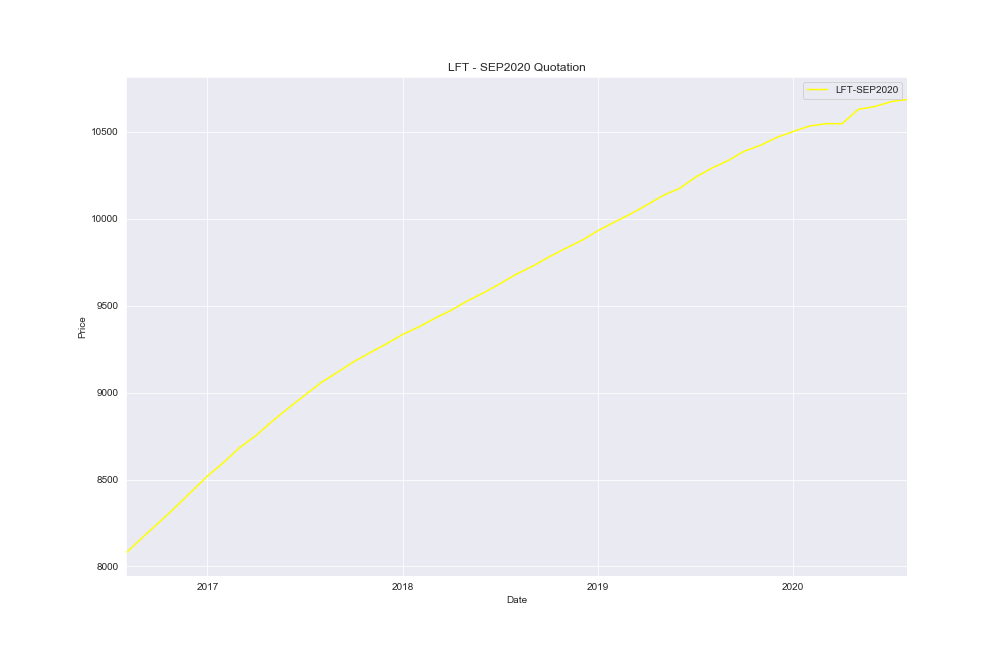

In [162]:
#PLot LFT
#plt.figure()
LFT.plot(kind = 'line', color = 'yellow', figsize = (14,9), title = 'LFT - SEP2020 Quotation')
plt.ylabel('Price')
plt.gcf().set_dpi(80)

In [137]:
# We have LFT prices over the same period of BOVA11 and SMAL11
total_return_LFT = (LFT.pct_change() + 1).prod() - 1
total_return_LFT

LFT-SEP2020    0.334836
dtype: float64

In [138]:
#I pick up just the month close price
LFT.index  = LFT.index.to_period('M')
LFT = LFT.copy().reset_index().drop_duplicates(subset = 'Date', keep = 'last').set_index('Date')
LFT

,LFT-SEP2020
Date,
2016-08,8077.400
2016-09,8166.130
2016-10,8251.490
2016-11,8337.050
2016-12,8428.790
2017-01,8519.940
2017-02,8598.310
2017-03,8685.220
2017-04,8754.530


C:\Users\Rodolfo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


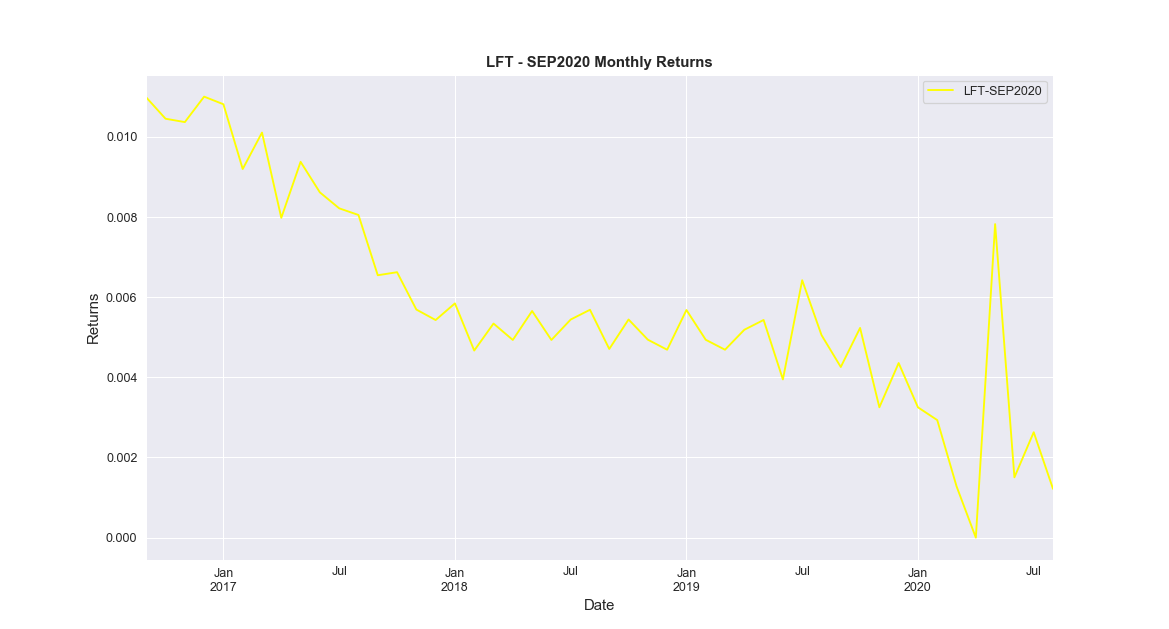

In [139]:
#plt.figure()
(LFT.pct_change().drop(LFT.index[0], axis = 0)).plot(kind = 'line', color = 'yellow')
plt.title('LFT - SEP2020 Monthly Returns', fontsize = 12, fontweight = 'bold')
plt.xlabel('Date', fontsize = 12)
plt.ylabel ('Returns', fontsize =12)
#Setting
plt.gcf().set_size_inches(13,7)
plt.gcf().set_dpi(100)

In [140]:
#Monthly Return
free_risk = (LFT.pct_change() +1).prod()**(1/n_month) -1
free_risk.values[0]

0.0038945702466743892

In [141]:
#SHarpe Ratio (montly)
excess_return = (return_month - free_risk.values[0])
sharpe = excess_return/volatility
sharpe

BOVA11    0.062319
SMAL11    0.072973
dtype: float64

In [142]:
#Yearly Return of the Treasury
lft_return_y = (free_risk+1)**12 - 1
lft_return_y

LFT-SEP2020    0.047749
dtype: float64

In [143]:
#total over all the period
(lft_return_y+1)**6 -1

LFT-SEP2020    0.32295
dtype: float64

In [92]:
#Sharpe Ratio (Yearly)
excess_return = return_y - ((free_risk.values[0]+1)**12 -1)
sharpe_anual = excess_return/vol_annual
sharpe_anual

BOVA11    0.230875
SMAL11    0.272131
dtype: float64

In [144]:
#Annual Returns
(returns + 1).prod()**(12/n_month) - 1

BOVA11    0.104755
SMAL11    0.120570
dtype: float64

In [145]:
return_y

BOVA11    0.104755
SMAL11    0.120570
dtype: float64

## Measuring Max Drawdown

### The max drawdown is the maximum loss from the previous hight to a subsequent low. Is the worst return possible between a pick and a trough
### It's possible to get this return buying at any asset highest value and selling at the bottom

In [20]:
returns

,BOVA11,SMAL11
Date,,
2014-10,0.006459,-0.016044
2014-11,0.003209,-0.006418
2014-12,-0.086736,-0.072800
2015-01,-0.060363,-0.118998
2015-02,0.096470,0.057705
...,...,...
2020-04,0.113338,0.148774
2020-05,0.089885,0.046782
2020-06,0.088770,0.138933


Text(0.5, 1.0, 'Cumulative Value')

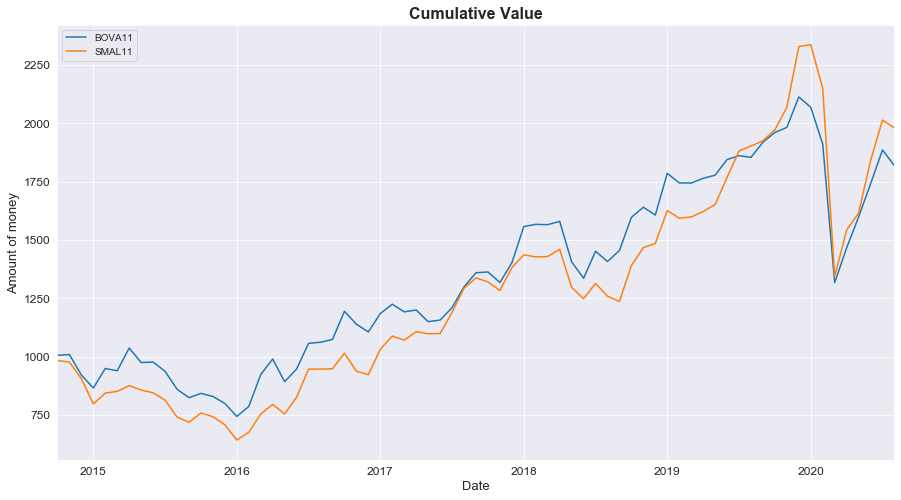

In [54]:
# Step by step to  Computing drawndowns
# 1. Compute a wealth index
# 2. Comput previous peaks
# 3. Compute drawndowns
invested_value = 1000
wealth_index = invested_value * (returns +1).cumprod()
wealth_index.plot(kind = 'line', alpha = 1, figsize = (15,8), fontsize = 12)
plt.ylabel('Amount of money', fontsize = 13)
plt.xlabel('Date', fontsize = 13)
plt.title('Cumulative Value', fontsize = 16, fontweight = 'bold')

Text(0.5, 1.0, 'Maximum Value')

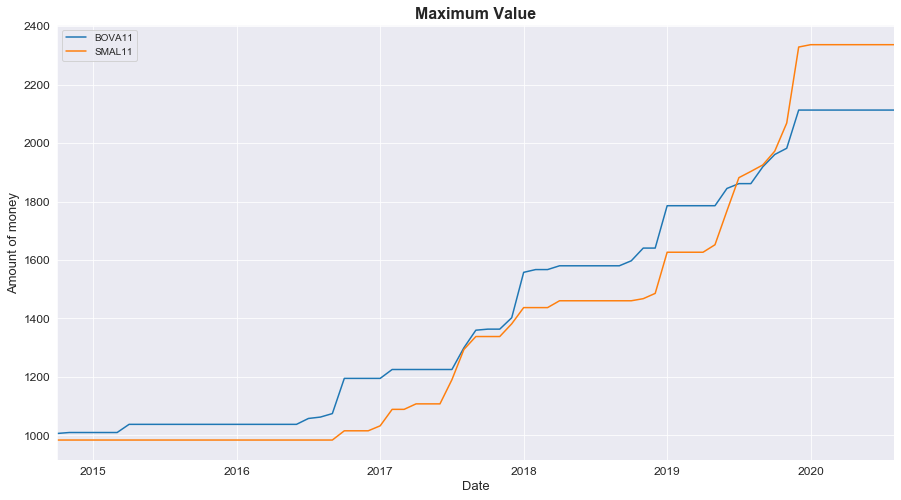

In [53]:
#compute previous peak
previous_peaks = wealth_index.cummax()
previous_peaks.plot(kind = 'line', alpha = 1, figsize = (15,8), fontsize = 12)
plt.ylabel('Amount of money', fontsize = 13)
plt.xlabel('Date', fontsize = 13)
plt.title('Maximum Value', fontsize = 16, fontweight = 'bold')

Text(0.5, 0, 'Date')

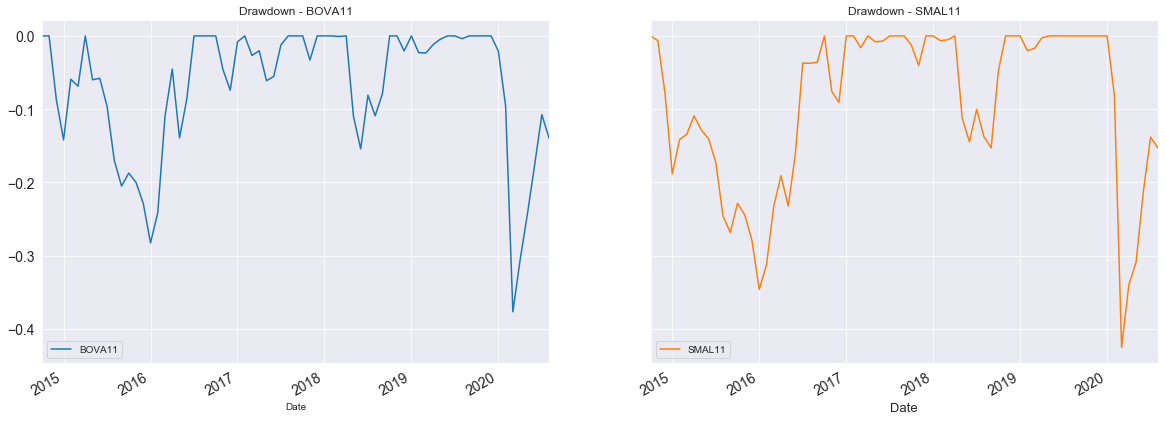

In [80]:
#Computing drawdown
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot(kind = 'line', figsize = (20,7), alpha = 1, subplots = True, sharey = True, layout = (1,2), fontsize = 14, title = ['Drawdown - BOVA11','Drawdown - SMAL11'] )
plt.ylabel('Return', fontsize = 13)
plt.xlabel('Date', fontsize = 13)
#plt.title('Drawdown', fontsize = 16, fontweight = 'bold', )

In [82]:
#Maximum  Drawdowon
drawdown.min()

BOVA11   -0.376517
SMAL11   -0.425097
dtype: float64

In [83]:
drawdown.idxmin()

BOVA11    2020-03
SMAL11    2020-03
dtype: period[M]

In [87]:
#Maximum Drawdown before 2020
print(drawdown[:'2019'].min())
print(drawdown[:'2019'].idxmin())

BOVA11   -0.282497
SMAL11   -0.345880
dtype: float64
BOVA11    2016-01
SMAL11    2016-01
dtype: period[M]


## VaR: Value at Risk
### VaR represents the maximum expected loss over a given time period at a specified confidence level.The loss is represented by a positive number
### Let's determine the interval confidence that measures how confident we are that a certain unknown parameter of a population is into that interval.
### Given a random sample from the population, we know that the sample mean is also a random variable with a normal distribution. We can define:
#  $$ \mu = \mu_{\bar{R}}\\ \sigma_{\bar{R}} = \frac{\sigma}{\sqrt{n}} $$
### Which mu and sigma are the population's parameters we'd like to estimate
### In a nutshell, given many combinations to take samples of a same size, we'll get a distribution of samples avarages  wich the mean of average of each sample is equal (or very close) to the population mean.
### Then, it's possible to figure out the score z to find the same area under the curve in a standard normal curve with mean = 0, std = 1.:
# $$ z = \frac{\bar{R} -\mu}{\frac{\sigma}{\sqrt{n}}} $$
### We use a standard Gaussian curve to figure out the area under the curve (probability) to estimate population parameters through the sample, given a confidence interval. The probability is
#  $$ Pr\left(-Z_{\alpha/2}\le\frac{\bar{R} -\mu}{\frac{\sigma}{\sqrt{n}}} \le Z_{\alpha/2}\right) = \alpha\Rightarrow Pr\left(\bar{R} - Z_{\alpha}\frac{\sigma}{\sqrt{n}}\le \mu \le\bar{R} + Z_{\alpha}\frac{\sigma}{\sqrt{n}}\right) = \alpha $$
### Then, the interval is : $$ \left(\bar{R} - Z_{\alpha/2}\frac{\sigma}{\sqrt{n}}, \bar{R} + Z_{\alpha/2}\frac{\sigma}{\sqrt{n}} \right)  $$ 
### The greater the sample size the less the variance of samples average and more accuracy is the estimation of population standard deviation. In that case, I'm considering my sample behavior resembles the population behavior duo to a large sample size. So :
# $\mu_{p} = \bar{R}  $
# $\sigma_p = \frac{\sigma}{\sqrt{n}}$
# $$ \left(\mu_{p} - Z_{\alpha/2}{\sigma_{p}}, \mu_{p} + Z_{\alpha/2}{\sigma_{p}} \right) $$
### Sigma p and mu p is the volatility and the  mean respectively over a periods I'm watching. As Var is a mesure of risk, we are interested on the left side of the curve. The var at level alpha is the smallest return R such the probability Pr does not exceed R at least (1-alpha).
### The var at level alpha is (1-alpha) quantile  of R
#  $ Pr\left(\frac{R_{p} - \mu_{p}}{\sigma_{p}}\le Z_{\alpha}\right) = \alpha \Rightarrow Pr\left(R_{p} \le \mu_{p} +Z_{\alpha} \sigma_{p} \right) = \alpha$
### In this way we have:
# $ VaR_{\alpha} = -(\mu_{p} +Z_{\alpha}\sigma_{p}) $


## Modified Cornissh - Fisher Var

In [146]:
def var_cf(r, level = 5, modified = False):
    #Compute the zero score assuming it was Gaussian
    z = stats.norm.ppf(level/100)
    s = skewness(r)
    k = kurtosis(r)
    z = (z + (z**2 - 1)*s/6 + (z**3 - 3*z)*(k-3)/24 - (2*z**3 - 5*z)*(s**2)/36)
    return abs(r.mean() + z*r.std(ddof = 0))
    
VaR_cf = var_cf(returns)
VaR_cf
    

BOVA11    0.119010
SMAL11    0.133797
dtype: float64

## Parametric Var - Gaussian

In [147]:
def var_gaussian(r):
    """This method gets the 5% percentile value of a standard gaussian distribution,
    that is,  a gaussian curve with mean 0 and std 1. It returns the z-score 
    """
    z = stats.norm.ppf(.05) 
    return abs(r.mean() + z* r.std(ddof = 0))
VaR_gaussian = var_gaussian(returns)
VaR_gaussian

BOVA11    0.105305
SMAL11    0.113238
dtype: float64

## Historical Val

In [148]:
def var_historic(r,level = 0.05):
    """ Var Historic
    """
    if  isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic,level = level)
    elif isinstance(r, pd.Series):
        return abs(np.quantile(r,q = level))
    else:
        raise TypeError("Expectd r to be Series or DataFrame")
VaR_hist = var_historic(returns)
(VaR_hist)

BOVA11    0.084182
SMAL11    0.090321
dtype: float64

In [149]:
VaR_hist.to_list()

[0.08418208657685133, 0.09032117905943404]

In [150]:
VaR = pd.DataFrame({'Historic VaR': VaR_hist.to_list(),'Gaussian VaR': VaR_gaussian.to_list(),'Cornissh - Fisher VaR': VaR_cf.to_list()}, index = returns.columns)
VaR

,Historic VaR,Gaussian VaR,Cornissh - Fisher VaR
BOVA11,0.084182,0.105305,0.119010
SMAL11,0.090321,0.113238,0.133797


C:\Users\Rodolfo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<IPython.core.display.Javascript object>


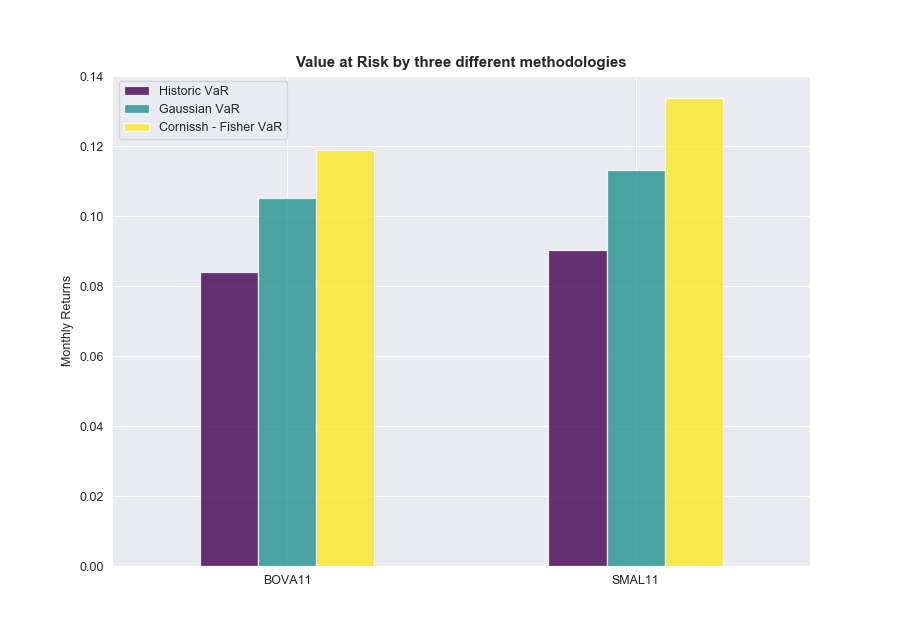

(array([0, 1]), <a list of 2 Text xticklabel objects>)

In [151]:
VaR = pd.DataFrame({'Historic VaR': VaR_hist.to_list(),'Gaussian VaR': VaR_gaussian.to_list(),'Cornissh - Fisher VaR': VaR_cf.to_list()}, index = returns.columns)
VaR.plot(kind = 'bar', colormap = 'viridis', alpha = 0.8, figsize = (10,7))
plt.ylabel('Monthly Returns')
plt.title('Value at Risk by three different methodologies', fontsize = 12, fontweight = 'bold')
#Settings
plt.subplots_adjust(bottom= 0.1)
plt.xticks(rotation = 0)